In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [8]:
def load_data():
    crime_df = pd.read_csv('../data/crime_district.csv')
    income_df = pd.read_csv('../data/hh_income_state.csv')
    poverty_df = pd.read_csv('../data/hh_poverty_state.csv')
    labor_df = pd.read_csv('../data/lfs_state_sex.csv')

    for df in [crime_df, income_df, poverty_df, labor_df]:
        df['date'] = pd.to_datetime(df['date'])
        df['year'] = df['date'].dt.year
    
    return crime_df, income_df, poverty_df, labor_df


In [9]:
load_data()

(                   state     district  category                      type  \
 0               Malaysia          All   assault                       all   
 1               Malaysia          All   assault                       all   
 2               Malaysia          All   assault                       all   
 3               Malaysia          All   assault                       all   
 4               Malaysia          All   assault                       all   
 ...                  ...          ...       ...                       ...   
 19147  W.P. Kuala Lumpur  Wangsa Maju  property  theft_vehicle_motorcycle   
 19148  W.P. Kuala Lumpur  Wangsa Maju  property  theft_vehicle_motorcycle   
 19149  W.P. Kuala Lumpur  Wangsa Maju  property  theft_vehicle_motorcycle   
 19150  W.P. Kuala Lumpur  Wangsa Maju  property  theft_vehicle_motorcycle   
 19151  W.P. Kuala Lumpur  Wangsa Maju  property  theft_vehicle_motorcycle   
 
             date  crimes  year  
 0     2016-01-01   22327  2

In [12]:
crime_df = pd.read_csv('../data/crime_district.csv')
income_df = pd.read_csv('../data/hh_income_state.csv')
poverty_df = pd.read_csv('../data/hh_poverty_state.csv')
labor_df = pd.read_csv('../data/lfs_state_sex.csv')


In [16]:

crime_df["date"] = pd.to_datetime(crime_df["date"])
crime_df["year"] = crime_df["date"].dt.year
crime_df.head()

,state,district,category,type,date,crimes,year
0,Malaysia,All,assault,all,2016-01-01,22327,2016
1,Malaysia,All,assault,all,2017-01-01,21366,2017
2,Malaysia,All,assault,all,2018-01-01,16902,2018
3,Malaysia,All,assault,all,2019-01-01,16489,2019
4,Malaysia,All,assault,all,2020-01-01,13279,2020


In [17]:
print("Data Overview:")
print(crime_df.head())
print("\nData Information:")
print(crime_df.info())
print("\nSummary Statistics:")
print(crime_df.describe())

Data Overview:
      state district category type       date  crimes  year
0  Malaysia      All  assault  all 2016-01-01   22327  2016
1  Malaysia      All  assault  all 2017-01-01   21366  2017
2  Malaysia      All  assault  all 2018-01-01   16902  2018
3  Malaysia      All  assault  all 2019-01-01   16489  2019
4  Malaysia      All  assault  all 2020-01-01   13279  2020

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     19152 non-null  object        
 1   district  19152 non-null  object        
 2   category  19152 non-null  object        
 3   type      19152 non-null  object        
 4   date      19152 non-null  datetime64[ns]
 5   crimes    19152 non-null  int64         
 6   year      19152 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 972.7+ KB
Non

Analyze trends in assault crimes over time

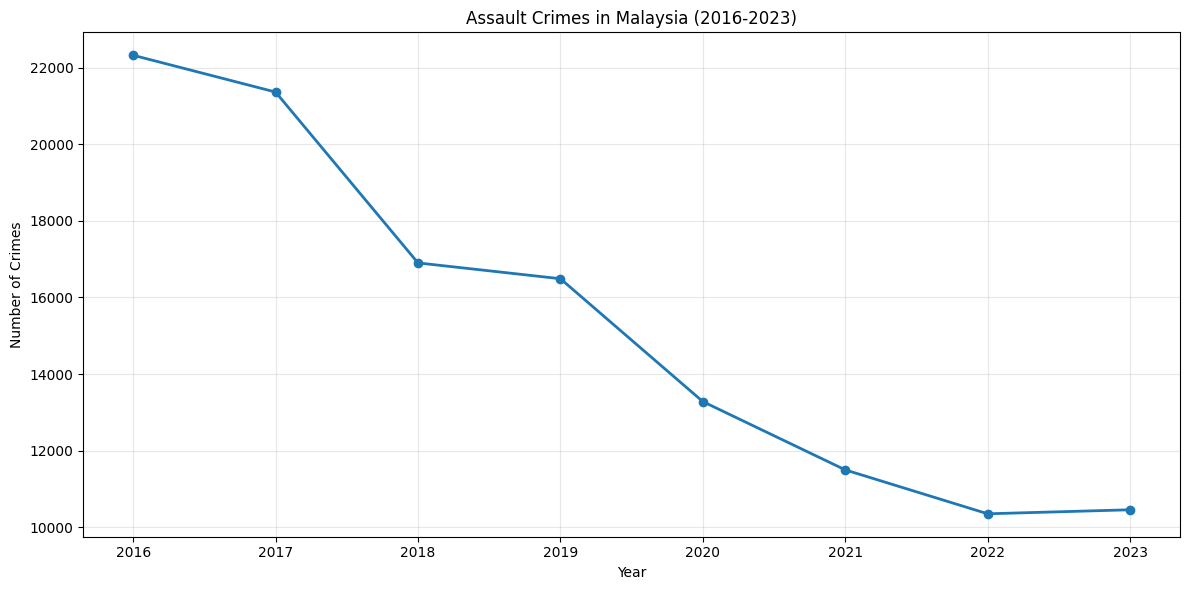

In [36]:
assault_trend = crime_df[(crime_df["state"] == "Malaysia") & (crime_df["category"] == "assault") & (crime_df["type"] == "all")]


plt.figure(figsize=(12, 6))
plt.plot(assault_trend["year"], assault_trend["crimes"], marker='o', linewidth=2)
plt.title("Assault Crimes in Malaysia (2016-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Compare assault vs causing_injury trends

In [20]:
assault_by_type = crime_df[(crime_df["state"] == "Malaysia") & (crime_df["category"] == "assault")].pivot_table(
    index="year", columns="type", values="crimes", aggfunc="sum"
)

In [21]:
if not assault_by_type.empty and "causing_injury" in assault_by_type.columns:
    plt.figure(figsize=(12, 6))
    assault_by_type.plot(kind="bar", figsize=(12, 6))
    plt.title("Assault Crimes by Type in Malaysia")
    plt.xlabel("Year")
    plt.ylabel("Number of Crimes")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("assault_by_type.png")
    plt.close()

<Figure size 1200x600 with 0 Axes>

Analyze state distribution for a specific year

In [22]:
state_data = crime_df[crime_df["date"].dt.year == 2016].groupby("state")["crimes"].sum().reset_index()
state_data = state_data.sort_values("crimes", ascending=False)

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x="state", y="crimes", data=state_data)
plt.title("Crime Distribution by State (2016)")
plt.xlabel("State")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("state_distribution.png")
plt.close()

Analyze crime categories

In [25]:
category_data = crime_df.groupby("category")["crimes"].sum().reset_index()
category_data = category_data.sort_values("crimes", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="category", y="crimes", data=category_data)
plt.title("Crime Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.savefig("category_distribution.png")
plt.close()

Calculate year-over-year change in assault crimes

In [27]:
assault_trend = assault_trend.sort_values("date")
assault_trend["pct_change"] = assault_trend["crimes"].pct_change() * 100

In [28]:
print("\nYear-over-Year Change in Assault Crimes:")
print(assault_trend[["year", "crimes", "pct_change"]])


Year-over-Year Change in Assault Crimes:
   year  crimes  pct_change
0  2016   22327         NaN
1  2017   21366   -4.304206
2  2018   16902  -20.893008
3  2019   16489   -2.443498
4  2020   13279  -19.467524
5  2021   11495  -13.434747
6  2022   10348   -9.978251
7  2023   10453    1.014689


In [30]:
pivot_data = crime_df.pivot_table(
    index="state", columns="category", values="crimes", aggfunc="sum"
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap="YlOrRd", fmt=".0f")
plt.title("Crime Categories by State")
plt.tight_layout()
plt.savefig("category_state_heatmap.png")
plt.close()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Make sure we have enough data points for decomposition
if len(assault_trend) >= 4:
    assault_time_series = assault_trend.set_index("date")["crimes"]
    
    # Try to decompose if we have enough data points (might need more for proper analysis)
    try:
        decomposition = seasonal_decompose(assault_time_series, model='additive', period=2)
        
        plt.figure(figsize=(12, 10))
        plt.subplot(411)
        plt.plot(assault_time_series, label='Original')
        plt.legend(loc='best')
        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend')
        plt.legend(loc='best')
        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonality')
        plt.legend(loc='best')
        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuals')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.savefig("time_series_decomposition.png")
        plt.close()
    except Exception as e:
        print(f"Could not perform time series decomposition: {e}")

# Step 10: Correlation analysis
# Create a correlation matrix for crime categories
correlation_matrix = crime_df.pivot_table(
    index=["state", "date"], columns="category", values="crimes", aggfunc="sum"
).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Crime Categories")
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.close()

Create a comprehensive report with insights

In [34]:
print("\n===== COMPREHENSIVE CRIME ANALYSIS REPORT =====")
print("\n1. Overall Trend Analysis:")
print(f"   - Total crimes recorded in the dataset: {crime_df['crimes'].sum()}")
print(f"   - Highest number of assault crimes: {assault_trend['crimes'].max()} in {assault_trend.loc[assault_trend['crimes'].idxmax(), 'year']}")
print(f"   - Lowest number of assault crimes: {assault_trend['crimes'].min()} in {assault_trend.loc[assault_trend['crimes'].idxmin(), 'year']}")

# Calculate the percent decrease from 2016 to 2023
if 2016 in assault_trend["year"].values and 2023 in assault_trend["year"].values:
    crimes_2016 = assault_trend[assault_trend["year"] == 2016]["crimes"].values[0]
    crimes_2023 = assault_trend[assault_trend["year"] == 2023]["crimes"].values[0]
    percent_change = ((crimes_2023 - crimes_2016) / crimes_2016) * 100
    print(f"   - Percent change from 2016 to 2023: {percent_change:.2f}%")

print("\n2. State Analysis:")
if not state_data.empty:
    top_state = state_data.iloc[0]["state"]
    top_state_crimes = state_data.iloc[0]["crimes"]
    print(f"   - State with highest crime rate: {top_state} with {top_state_crimes} crimes")

print("\n3. Category Analysis:")
if not category_data.empty:
    top_category = category_data.iloc[0]["category"]
    top_category_crimes = category_data.iloc[0]["crimes"]
    print(f"   - Most common crime category: {top_category} with {top_category_crimes} crimes")

print("\n4. Recommendations for Further Analysis:")
print("   - Investigate socioeconomic factors in high-crime states")
print("   - Analyze the impact of COVID-19 on crime rates (note the drop in 2020-2021)")
print("   - Study the relationship between property crimes and economic indicators")
print("   - Examine the effectiveness of crime prevention measures in states with declining rates")


===== COMPREHENSIVE CRIME ANALYSIS REPORT =====

1. Overall Trend Analysis:
   - Total crimes recorded in the dataset: 3633671
   - Highest number of assault crimes: 22327 in 2016
   - Lowest number of assault crimes: 10348 in 2022
   - Percent change from 2016 to 2023: -53.18%

2. State Analysis:
   - State with highest crime rate: Malaysia with 224710 crimes

3. Category Analysis:
   - Most common crime category: property with 2897717 crimes

4. Recommendations for Further Analysis:
   - Investigate socioeconomic factors in high-crime states
   - Analyze the impact of COVID-19 on crime rates (note the drop in 2020-2021)
   - Study the relationship between property crimes and economic indicators
   - Examine the effectiveness of crime prevention measures in states with declining rates
